Ulises Troncoso

My final project will be trying to predict a team to either win, lose, or draw using a linear regression model. 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Dropout
import sklearn
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import mean_absolute_error
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
matches = pd.read_csv('data/match.csv', index_col=0)

In [3]:
matches.head()

date   time     comp        round  day venue result   gf   ga  \
0  2023-08-12  21:30  La Liga  Matchweek 1  Sat  Away      W  2.0  0.0   
1  2023-08-19  19:30  La Liga  Matchweek 2  Sat  Away      W  3.0  1.0   
2  2023-08-25  21:30  La Liga  Matchweek 3  Fri  Away      W  1.0  0.0   
3  2023-09-02  16:15  La Liga  Matchweek 4  Sat  Home      W  2.0  1.0   
4  2023-09-17  21:00  La Liga  Matchweek 5  Sun  Home      W  2.0  1.0   

        opponent  ...  match report  notes    sh   sot  dist   fk pk pkatt  \
0  Athletic Club  ...  Match Report    NaN  14.0   8.0  16.0  2.0  0     0   
1        Almería  ...  Match Report    NaN  25.0   9.0  17.0  1.0  0     0   
2     Celta Vigo  ...  Match Report    NaN   9.0   2.0  19.4  0.0  0     1   
3         Getafe  ...  Match Report    NaN  26.0  12.0  17.7  0.0  0     0   
4  Real Sociedad  ...  Match Report    NaN  17.0   8.0  15.9  1.0  0     0   

   season         team  
0    2023  Real Madrid  
1    2023  Real Madrid  
2    2023  Real Madrid  
3    2023  Real Madrid  
4    2023  Real Madrid  

[5 rows x 27 columns]

In [4]:
#seeing the number of nulls in the columns
matches.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       976
captain            0
formation          0
referee            0
match report       0
notes           4100
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [5]:
matches.describe()

gf           ga           xg          xga         poss  \
count  4100.000000  4100.000000  4100.000000  4100.000000  4100.000000   
mean      1.267073     1.267073     1.274098     1.274098    50.001220   
std       1.155463     1.155463     0.764009     0.764009    11.395558   
min       0.000000     0.000000     0.000000     0.000000    18.000000   
25%       0.000000     0.000000     0.700000     0.700000    42.000000   
50%       1.000000     1.000000     1.100000     1.100000    50.000000   
75%       2.000000     2.000000     1.700000     1.700000    58.000000   
max       8.000000     8.000000     5.300000     5.300000    82.000000   

         attendance  notes           sh          sot         dist  \
count   3124.000000    0.0  4100.000000  4100.000000  4098.000000   
mean   27171.738156    NaN    11.533659     3.802927    18.207638   
std    18691.487582    NaN     4.758074     2.269733     3.365204   
min       13.000000    NaN     0.000000     0.000000     4.800000   
25%    13512.000000    NaN     8.000000     2.000000    16.000000   
50%    19320.500000    NaN    11.000000     3.000000    18.000000   
75%    38769.000000    NaN    14.000000     5.000000    20.100000   
max    95745.000000    NaN    36.000000    17.000000    46.200000   

                fk           pk        pkatt       season  
count  4100.000000  4100.000000  4100.000000  4100.000000  
mean      0.481463     0.134634     0.173659  2020.219512  
std       0.711251     0.366864     0.421534     1.569908  
min       0.000000     0.000000     0.000000  2018.000000  
25%       0.000000     0.000000     0.000000  2019.000000  
50%       0.000000     0.000000     0.000000  2020.000000  
75%       1.000000     0.000000     0.000000  2022.000000  
max       5.000000     3.000000     3.000000  2023.000000

In [6]:
#dropping the columns with null values and that are unimportant
matches = matches.drop('notes', axis=1)

In [7]:
matches = matches.drop('attendance', axis=1)

In [8]:
matches.isnull().sum()

date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            2
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [9]:
#replacing null values with 0s
matches['dist'] = matches['dist'].fillna(0)

In [10]:
matches.isnull().sum()

date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [11]:
matches.shape

(4100, 25)

In [12]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
captain          object
formation        object
referee          object
match report     object
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [13]:
#making the date column into the datetime format instead of object
matches['date'] = pd.to_datetime(matches['date'])

In [14]:
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
captain                 object
formation               object
referee                 object
match report            object
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [15]:
#setting the date range for las season
start_date = pd.to_datetime('2022-08-01')
end_date = pd.to_datetime('2023-07-31')
mask = (matches['date'] > start_date) & (matches['date'] <= end_date)

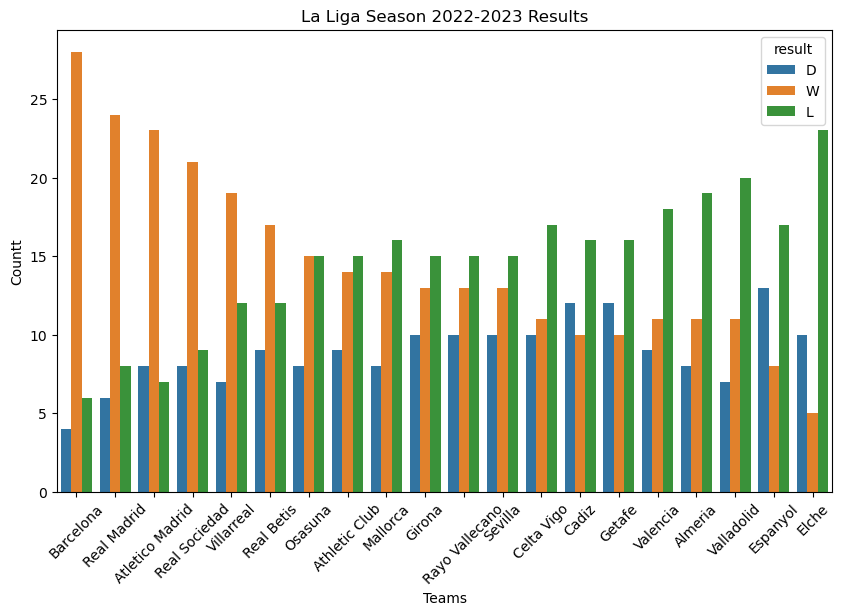

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='team', hue='result', data=matches.loc[mask])
plt.xticks(rotation = 45)
plt.xlabel('Teams')
plt.ylabel('Countt')
plt.title('La Liga Season 2022-2023 Results')
plt.show()

In [17]:
#date range for this season
start_date = pd.to_datetime('2023-08-01')
end_date = pd.to_datetime('2024-07-31')
maskc = (matches['date'] > start_date) & (matches['date'] <= end_date)

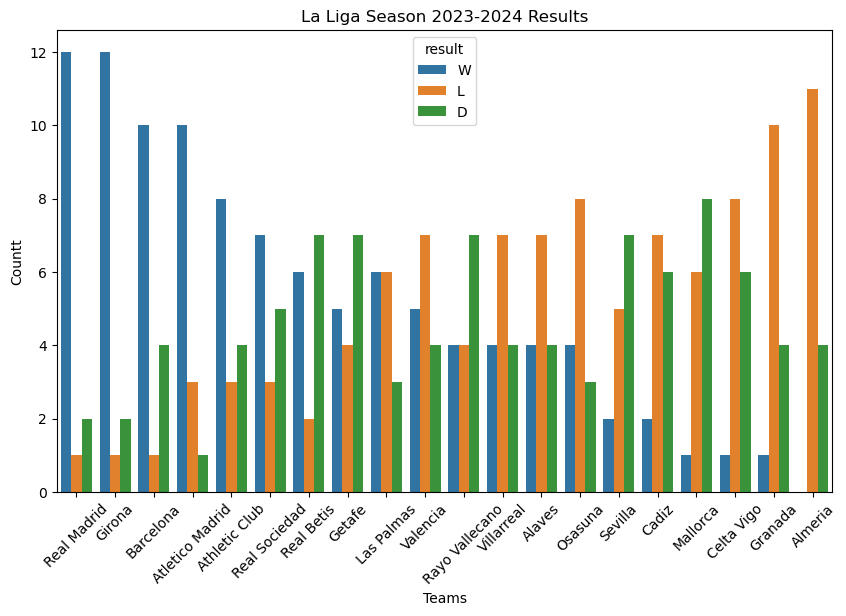

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='team', hue='result', data=matches.loc[maskc])
plt.xticks(rotation = 45)
plt.xlabel('Teams')
plt.ylabel('Countt')
plt.title('La Liga Season 2023-2024 Results')
plt.show()

Preprocess

In [19]:
#change the W,D,L to LabelEncoder so it is 0,1,2
matches['result'].unique()

array(['W', 'L', 'D'], dtype=object)

In [22]:
le = LabelEncoder()

In [23]:
matches['result_code'] = le.fit_transform(matches['result'])

In [24]:
matches.head()

date   time     comp        round  day venue result   gf   ga  \
0 2023-08-12  21:30  La Liga  Matchweek 1  Sat  Away      W  2.0  0.0   
1 2023-08-19  19:30  La Liga  Matchweek 2  Sat  Away      W  3.0  1.0   
2 2023-08-25  21:30  La Liga  Matchweek 3  Fri  Away      W  1.0  0.0   
3 2023-09-02  16:15  La Liga  Matchweek 4  Sat  Home      W  2.0  1.0   
4 2023-09-17  21:00  La Liga  Matchweek 5  Sun  Home      W  2.0  1.0   

        opponent  ...  match report    sh   sot  dist   fk pk pkatt  season  \
0  Athletic Club  ...  Match Report  14.0   8.0  16.0  2.0  0     0    2023   
1        Almería  ...  Match Report  25.0   9.0  17.0  1.0  0     0    2023   
2     Celta Vigo  ...  Match Report   9.0   2.0  19.4  0.0  0     1    2023   
3         Getafe  ...  Match Report  26.0  12.0  17.7  0.0  0     0    2023   
4  Real Sociedad  ...  Match Report  17.0   8.0  15.9  1.0  0     0    2023   

          team  result_code  
0  Real Madrid            2  
1  Real Madrid            2  
2  Real Madrid            2  
3  Real Madrid            2  
4  Real Madrid            2  

[5 rows x 26 columns]

In [25]:
#changing these columns to category then converting them to a set of numbers
matches['venue_code'] = matches['venue'].astype('category').cat.codes

In [26]:
matches['opp_code'] = matches['opponent'].astype('category').cat.codes

In [27]:
matches['time_code'] = matches['time'].astype('category').cat.codes

In [28]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'captain', 'formation', 'referee',
       'match report', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season',
       'team', 'result_code', 'venue_code', 'opp_code', 'time_code'],
      dtype='object')

In [29]:
X = matches[['sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'xga', 'xg', 
             'venue_code', 'opp_code', 'time_code', 'gf', 'ga', 'poss']]

In [30]:
y = matches['result_code']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=50)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
print(lm.intercept_)

1.0953436807095345


In [36]:
lm.coef_

array([-0.07275146,  0.03354197,  0.0219513 , -0.0218429 , -0.00250514,
       -0.01876845,  0.01339965,  0.07465807,  0.02865408, -0.01915203,
        0.00540433,  0.34780714, -0.15072979, -0.02389869])

In [37]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
sh            -0.072751
sot            0.033542
dist           0.021951
fk            -0.021843
pk            -0.002505
pkatt         -0.018768
xga            0.013400
xg             0.074658
venue_code     0.028654
opp_code      -0.019152
time_code      0.005404
gf             0.347807
ga            -0.150730
poss          -0.023899

In [38]:
# creating the model
model = Sequential()

#hidden layers
model.add(Dense(12, input_shape=(14,), activation='relu'))

model.add(Dense(5, activation='relu'))
#dropout Layer
model.add(Dropout(0.4))

model.add(Dense(5, activation='relu'))

#Output layer: 
model.add(Dense(1, activation = 'linear'))

# compile
model.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [39]:
#summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                180       
                                                                 
 dense_1 (Dense)             (None, 5)                 65        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#fitting thr model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, validation_split=0.33,)

Epoch 1/200
71/71 [==============================] - 1s 8ms/step - loss: 0.8225 - accuracy: 0.3530 - val_loss: 0.6637 - val_accuracy: 0.3534
Epoch 2/200
71/71 [==============================] - 0s 5ms/step - loss: 0.6225 - accuracy: 0.3667 - val_loss: 0.6358 - val_accuracy: 0.3534
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 0.6049 - accuracy: 0.3663 - val_loss: 0.6203 - val_accuracy: 0.3534
Epoch 4/200
71/71 [==============================] - 0s 7ms/step - loss: 0.5948 - accuracy: 0.3654 - val_loss: 0.6132 - val_accuracy: 0.3534
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.3645 - val_loss: 0.6114 - val_accuracy: 0.3534
Epoch 6/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5720 - accuracy: 0.3659 - val_loss: 0.5933 - val_accuracy: 0.3528
Epoch 7/200
71/71 [==============================] - 0s 7ms/step - loss: 0.5601 - accuracy: 0.3627 - val_loss: 0.5824 - val_accuracy: 0.3523
Epoch 8/200
7

Epoch 59/200
71/71 [==============================] - 1s 7ms/step - loss: 0.2264 - accuracy: 0.5051 - val_loss: 0.2167 - val_accuracy: 0.6038
Epoch 60/200
71/71 [==============================] - 1s 7ms/step - loss: 0.2330 - accuracy: 0.5024 - val_loss: 0.2220 - val_accuracy: 0.6033
Epoch 61/200
71/71 [==============================] - 1s 7ms/step - loss: 0.2228 - accuracy: 0.5157 - val_loss: 0.2376 - val_accuracy: 0.6173
Epoch 62/200
71/71 [==============================] - 0s 7ms/step - loss: 0.2145 - accuracy: 0.5211 - val_loss: 0.2103 - val_accuracy: 0.6092
Epoch 63/200
71/71 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.5149 - val_loss: 0.2315 - val_accuracy: 0.6179
Epoch 64/200
71/71 [==============================] - 1s 8ms/step - loss: 0.2124 - accuracy: 0.5228 - val_loss: 0.2346 - val_accuracy: 0.6206
Epoch 65/200
71/71 [==============================] - 1s 9ms/step - loss: 0.2085 - accuracy: 0.5322 - val_loss: 0.2291 - val_accuracy: 0.6184
Epoch 

71/71 [==============================] - 1s 7ms/step - loss: 0.1398 - accuracy: 0.5499 - val_loss: 0.1080 - val_accuracy: 0.6396
Epoch 117/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1328 - accuracy: 0.5570 - val_loss: 0.1051 - val_accuracy: 0.6396
Epoch 118/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1403 - accuracy: 0.5521 - val_loss: 0.0931 - val_accuracy: 0.6428
Epoch 119/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1500 - accuracy: 0.5415 - val_loss: 0.0977 - val_accuracy: 0.6423
Epoch 120/200
71/71 [==============================] - 0s 6ms/step - loss: 0.1523 - accuracy: 0.5455 - val_loss: 0.0919 - val_accuracy: 0.6428
Epoch 121/200
71/71 [==============================] - 1s 7ms/step - loss: 0.1400 - accuracy: 0.5494 - val_loss: 0.0909 - val_accuracy: 0.6428
Epoch 122/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1425 - accuracy: 0.5437 - val_loss: 0.0913 - val_accuracy: 0.6428
Epoch 123/200

71/71 [==============================] - 1s 10ms/step - loss: 0.1139 - accuracy: 0.5800 - val_loss: 0.0548 - val_accuracy: 0.6428
Epoch 174/200
71/71 [==============================] - 1s 10ms/step - loss: 0.1129 - accuracy: 0.5876 - val_loss: 0.0563 - val_accuracy: 0.6428
Epoch 175/200
71/71 [==============================] - 1s 9ms/step - loss: 0.1194 - accuracy: 0.5712 - val_loss: 0.0585 - val_accuracy: 0.6428
Epoch 176/200
71/71 [==============================] - 1s 9ms/step - loss: 0.1254 - accuracy: 0.5667 - val_loss: 0.0495 - val_accuracy: 0.6428
Epoch 177/200
71/71 [==============================] - 1s 9ms/step - loss: 0.1176 - accuracy: 0.5712 - val_loss: 0.0528 - val_accuracy: 0.6428
Epoch 178/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1111 - accuracy: 0.5787 - val_loss: 0.0586 - val_accuracy: 0.6428
Epoch 179/200
71/71 [==============================] - 1s 8ms/step - loss: 0.1187 - accuracy: 0.5752 - val_loss: 0.0558 - val_accuracy: 0.6428
Epoch 180/2

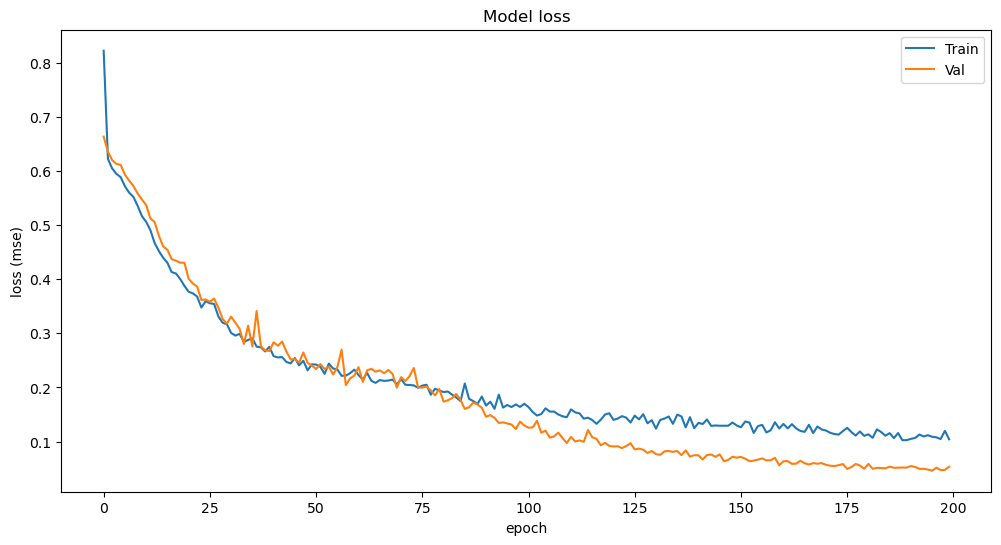

In [41]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

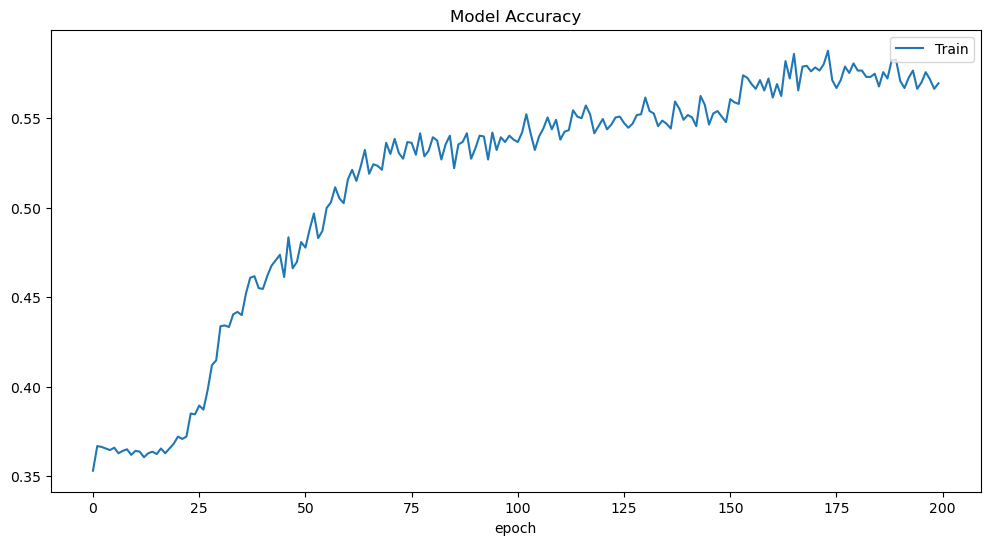

In [42]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['accuracy'][:])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.6428


In [44]:
loss

0.05339103937149048

In [45]:
accuracy

0.6428184509277344

In [46]:
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
y_pred[0:5]

58/58 [==============================] - 0s 2ms/step


array([[0.83963925],
       [1.8194282 ],
       [0.28082865],
       [0.61452955],
       [0.21146983]], dtype=float32)

In [56]:
y_pred[42]

array([0.22507983], dtype=float32)

In [58]:
#predicting with the model
model.predict(np.reshape(X_test[42], [1, 14]))

1/1 [==============================] - 0s 89ms/step


array([[0.05854005]], dtype=float32)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observacion')
    plt.xlabel('Prediction')

58/58 [==============================] - 0s 3ms/step


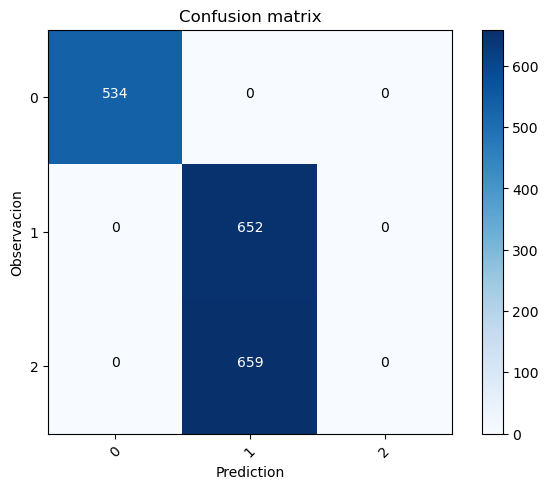

In [48]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred > 0.5) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [49]:
def model_builder(hp):
    
    
    model = Sequential()
    hp_units = hp.Int('units', min_value=4, max_value=24, step=4)
    model.add(Dense(units=hp_units, input_dim=14, activation='relu'))
   
    ##final layer
    model.add(Dense(1, activation = 'linear'))
    
    # Compile model
    model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
    return model

In [50]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy',
                     max_epochs=10, factor=3, 
                     directory='my_dir',
                     project_name='intro_to_kt')

Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [51]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [52]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 12.



In [53]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
57/57 [==============================] - 2s 10ms/step - loss: 3.6566 - accuracy: 0.2766 - val_loss: 2.7512 - val_accuracy: 0.2971
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 2.0479 - accuracy: 0.2993 - val_loss: 1.6812 - val_accuracy: 0.3259
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 1.3124 - accuracy: 0.3076 - val_loss: 1.1669 - val_accuracy: 0.3304
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 0.9595 - accuracy: 0.3093 - val_loss: 0.9056 - val_accuracy: 0.3060
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.7746 - accuracy: 0.3043 - val_loss: 0.7648 - val_accuracy: 0.2838
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.3016 - val_loss: 0.6836 - val_accuracy: 0.2927
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.2955 - val_loss: 0.6334 - val_accuracy: 0.2838
Epoch 8/100


Epoch 59/100
57/57 [==============================] - 0s 5ms/step - loss: 0.2029 - accuracy: 0.4983 - val_loss: 0.2377 - val_accuracy: 0.4745
Epoch 60/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1989 - accuracy: 0.4989 - val_loss: 0.2331 - val_accuracy: 0.4789
Epoch 61/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1954 - accuracy: 0.5033 - val_loss: 0.2294 - val_accuracy: 0.4812
Epoch 62/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.5078 - val_loss: 0.2266 - val_accuracy: 0.4878
Epoch 63/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1879 - accuracy: 0.5144 - val_loss: 0.2232 - val_accuracy: 0.4967
Epoch 64/100
57/57 [==============================] - 0s 7ms/step - loss: 0.1850 - accuracy: 0.5188 - val_loss: 0.2194 - val_accuracy: 0.5011
Epoch 65/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1813 - accuracy: 0.5227 - val_loss: 0.2139 - val_accuracy: 0.4989
Epoch 

In [54]:
hypermodel = tuner.hypermodel.build(best_hps)

#retain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 2s 10ms/step - loss: 2.7188 - accuracy: 0.2262 - val_loss: 1.9985 - val_accuracy: 0.2129
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 1.5768 - accuracy: 0.2450 - val_loss: 1.2698 - val_accuracy: 0.2572
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 1.1045 - accuracy: 0.2583 - val_loss: 0.9281 - val_accuracy: 0.2816
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 0.8745 - accuracy: 0.2622 - val_loss: 0.7615 - val_accuracy: 0.2705
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.7533 - accuracy: 0.2722 - val_loss: 0.6637 - val_accuracy: 0.2838
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.6726 - accuracy: 0.2838 - val_loss: 0.5995 - val_accuracy: 0.2816
Epoch 7/100
57/57 [==============================] - 0s 7ms/step - loss: 0.6130 - accuracy: 0.2905 - val_loss: 0.5526 - val_accuracy: 0.2816
Epoch 8/100


Epoch 59/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.4751 - val_loss: 0.2314 - val_accuracy: 0.4479
Epoch 60/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.4773 - val_loss: 0.2279 - val_accuracy: 0.4501
Epoch 61/100
57/57 [==============================] - 0s 7ms/step - loss: 0.1907 - accuracy: 0.4817 - val_loss: 0.2244 - val_accuracy: 0.4457
Epoch 62/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.4795 - val_loss: 0.2194 - val_accuracy: 0.4545
Epoch 63/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1837 - accuracy: 0.4873 - val_loss: 0.2143 - val_accuracy: 0.4479
Epoch 64/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1792 - accuracy: 0.4861 - val_loss: 0.2092 - val_accuracy: 0.4501
Epoch 65/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1752 - accuracy: 0.4850 - val_loss: 0.2046 - val_accuracy: 0.4634
Epoch 

In [55]:
eval_result = hypermodel.evaluate(X_train, y_train)
print('[test loss, test accuracy]', eval_result)

71/71 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.6226
[test loss, test accuracy] [0.05734390392899513, 0.6226164102554321]


The test accuracy is low and as seen in the confusion matrix the model could not predict a winner. It can predict a draw and a loss, so it seem the model is not seeing a pattern for winning. It could be an issue with the dataset or I should of used a different encoder like OneHot Encoder. It can be numerous things.